<a href="https://colab.research.google.com/github/LalithaEvani/fmml20211041/blob/main/Copy_of_FMML_M1L2_Features_Feb22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The aim of this lab is to introduce DATA and FEATURES.

## Let's get started.


## Make a copy before running the cells

# Extracting features from data

FMML Module 1, Lab 2<br>
 Module Coordinator : amit.pandey@research.iiit.ac.in <br>
 



In [1]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=3bfc3655ff90c3324a12be71b89bc547681b64df7badc92d592d2e3eeaa3b93a
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


## What are features? 
### features are individual independent variables that act like a input to your system.

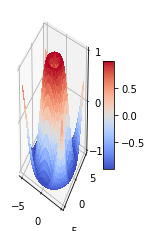

In [2]:
import matplotlib.pyplot as plt #pyplot is a collection of functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.
from matplotlib import cm #colormaps
import numpy as np #The fundamental package for scientific computing with Python

from mpl_toolkits.mplot3d.axes3d import get_test_data

 
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.9))#figaspect provides aspect ratio and figure takes the figsize as one of its attributes

# =============
# First subplot
# =============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')#1x2 grid 1st subplot 

# plot a 3D surface like in the example mplot3d/surface3d_demo
X = np.arange(-5, 5, 0.25) # feature 1 get 1-D array of values starting from -5 to 5 with a step size of 0.25

Y = np.arange(-5, 5, 0.25) # feature 2
X, Y = np.meshgrid(X, Y)#get values arranged in a format to plot in the graph

R = np.sqrt(X**2 + Y**2)
Z = np.sin(R) #output
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0.4, antialiased=False)#X,Y,Z data values as 2D arrays, rstride - array row stride(step size), cstride - array column stride(step size), cmap - color map for surface patches, anti-aliasing is smoothening of jagged edges for large data anti-aliasing is preferred to be false
ax.set_zlim(-1.01, 1.01)#set z limits 
fig.colorbar(surf, shrink=0.5, aspect=10) #add colorbar to the plot, shrink - Fraction by which to multiply the size of the colorbar - default - 1.0 , aspect - Ratio of long to short dimensions - default - 20

# Part 2: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features. 

Let us download a few documents off Wikipedia.

In [3]:
topic1 = 'Giraffe'
topic2 = 'Elephant'
wikipedia.set_lang('en') 
eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content
wikipedia.set_lang('fr')
fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

Getting Full Wikipedia Page Data

The page() method is used to get the contents, categories, coordinates, images, links and other metadata of a Wikipedia page.

Syntax : wikipedia.page(title)

Argument : Title of the topic.

Return : Return a WikipediaPage object. 

The language can be changed to your native language if the page exists in your native language.
Set_lang() method is used for the same. 

Syntax : wikipedia.set_lang(language)

Argument : prefix of the language like for arabic prefix is ar and so on.

Action performed : It converted the data into that language default language is english. 
 

This is what the text looks like:

In [4]:
eng1

'The giraffe is a tall African hoofed mammal belonging to the genus Giraffa. It is the tallest living terrestrial animal and the largest ruminant on Earth. Traditionally, giraffes were thought to be one species, Giraffa camelopardalis, with nine subspecies. Most recently, researchers proposed dividing giraffes into up to eight extant species due to new research into their mitochondrial and nuclear DNA, as well as morphological measurements. Seven other extinct species of Giraffa are known from the fossil record.\nThe giraffe\'s chief distinguishing characteristics are its extremely long neck and legs, its horn-like ossicones, and its spotted coat patterns. It is classified under the family Giraffidae, along with its closest extant relative, the okapi. Its scattered range extends from Chad in the north to South Africa in the south, and from Niger in the west to Somalia in the east. Giraffes usually inhabit savannahs and woodlands. Their food source is leaves, fruits, and flowers of wood

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [5]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters, re is module for regular expressions - sub(pattern, repl, string, count=0, flags=0) - replace content matching the pattern in the string with repl 
  return text

In [6]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [7]:
print(eng1)

thegiraffeisatallafricanhoofedmammalbelongingtothegenusgiraffaitisthetallestlivingterrestrialanimalandthelargestruminantonearthtraditionallygiraffeswerethoughttobeonespeciesgiraffacamelopardaliswithninesubspeciesmostrecentlyresearchersproposeddividinggiraffesintouptoeightextantspeciesduetonewresearchintotheirmitochondrialandnucleardnaaswellasmorphologicalmeasurementssevenotherextinctspeciesofgiraffaareknownfromthefossilrecordthegiraffeschiefdistinguishingcharacteristicsareitsextremelylongneckandlegsitshornlikeossiconesanditsspottedcoatpatternsitisclassifiedunderthefamilygiraffidaealongwithitsclosestextantrelativetheokapiitsscatteredrangeextendsfromchadinthenorthtosouthafricainthesouthandfromnigerinthewesttosomaliaintheeastgiraffesusuallyinhabitsavannahsandwoodlandstheirfoodsourceisleavesfruitsandflowersofwoodyplantsprimarilyacaciaspecieswhichtheybrowseatheightsmostotherherbivorescannotreachlionsleopardsspottedhyenasandafricanwilddogsmaypreyupongiraffesgiraffesliveinherdsofrelatedfemale

## Instead of directly using characters as the features, to understand a text better, we may consider group of tokens i.e. ngrams as features. 
## for this example let us consider that each character is one word, and let us see how n-grams work.


## nltk library provides many tools for text processing, please explore them.

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on. 

Let us count the frequency of each character in a text and plot it in a histogram.

In [8]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]#a tuple form of key is converted into a string for given list of keys 

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys()) #take a list of keys and take each key(which is in the form of tuple) and convert the key to string to obtain individual alphabetes in this case 
  values = list(ngram.values())
  #both keys and values are now lists
  # sort the keys in alphabetic order
  combined = zip(keys, values)#map keys and values to form a nested tuple 
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))#unzip zipped_sorted and place the resultant object as a list. Now keys and values contain list of elements.
  #map function takes a function to which map passes each iterable and iterable which is to be mapped 
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

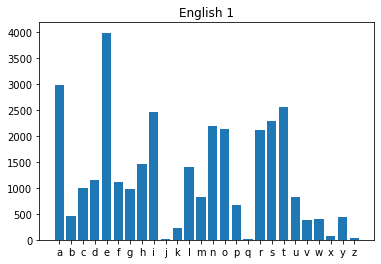

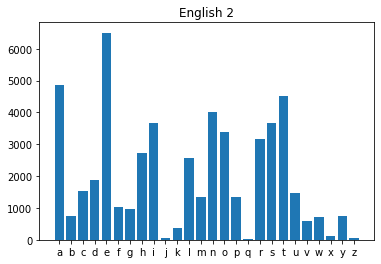

In [9]:
## we passed ngrams 'n' as 1 to get unigrams. Unigram is nothing but single token (in this case character).
#ngrams(string,n) where the string is converted into a list of values of length mentioned in n

unigram_eng1 = Counter(ngrams(eng1,1)) #counter takes list as input and gives a dictionary as output by counting the number of occurences of the same element in the given list 
plothistogram(unigram_eng1)#send the dictionary to the function and plot the histogram with letters vs their count 
plt.title('English 1')#name the histogram
plt.show()#view the histogram
#do the same with the other string and study the histograms to identify similarity- in english according to the two histograms letter e has the highest frequency 
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

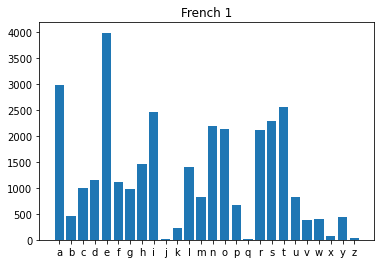

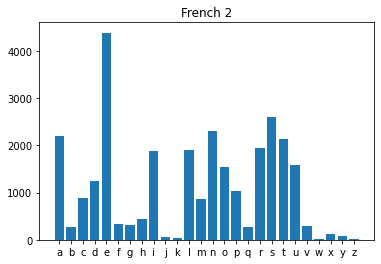

In [10]:
#do the same for french strings under consideration- we identify that letter e is more pronounced in even french 
#so we can't distinguish english and french based on unigrams hence unigram is not a good feature in this case 

unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

## A good feature is one that helps in easy prediction and classification. 
## for ex : if you wish to differentiate between grapes and apples, size can be one of the useful features.

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

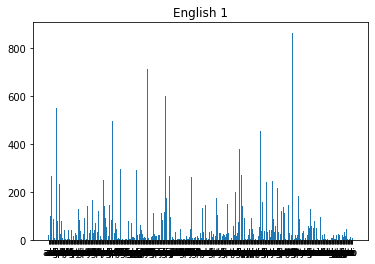

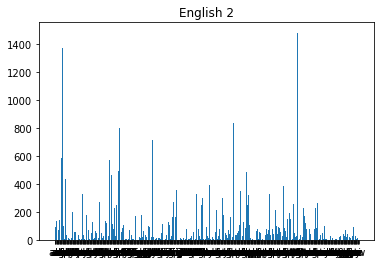

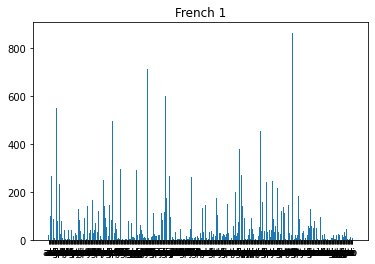

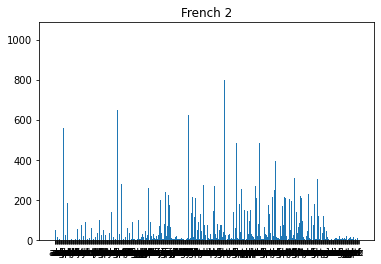

In [11]:
## Now instead of unigram, we will use bigrams as features, and see how useful bigrams are as features.

bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams - ngrams makes nested tuple with each small tuple consisting of two letters 
#print(tuple(ngrams(eng1,2)))
plothistogram(bigram_eng1)#take the count of each such pair identified and convert the tupled keys into string keys and then plot a histogram of the same for all the strings under consideration
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()
#this doensn't seem to be much of help 

Another way to visualize bigrams is to use a 2-dimensional graph.

In [12]:
## lets have a lot at bigrams.

bigram_eng1

Counter({('a', 'a'): 21,
         ('a', 'b'): 56,
         ('a', 'c'): 119,
         ('a', 'd'): 100,
         ('a', 'e'): 32,
         ('a', 'f'): 267,
         ('a', 'g'): 77,
         ('a', 'h'): 16,
         ('a', 'i'): 86,
         ('a', 'j'): 2,
         ('a', 'k'): 9,
         ('a', 'l'): 420,
         ('a', 'm'): 77,
         ('a', 'n'): 549,
         ('a', 'o'): 7,
         ('a', 'p'): 77,
         ('a', 'q'): 1,
         ('a', 'r'): 314,
         ('a', 's'): 232,
         ('a', 't'): 351,
         ('a', 'u'): 26,
         ('a', 'v'): 79,
         ('a', 'w'): 14,
         ('a', 'x'): 6,
         ('a', 'y'): 43,
         ('a', 'z'): 1,
         ('b', 'a'): 41,
         ('b', 'b'): 1,
         ('b', 'c'): 3,
         ('b', 'd'): 1,
         ('b', 'e'): 125,
         ('b', 'f'): 4,
         ('b', 'g'): 1,
         ('b', 'i'): 41,
         ('b', 'j'): 4,
         ('b', 'l'): 59,
         ('b', 'm'): 1,
         ('b', 'n'): 1,
         ('b', 'o'): 42,
         ('b', 'p'): 1,
      

In [13]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))] # checking for the letters keeping the first letter fixed and having combinations with the rest
       #ord() returns unicode for a given character 
      #chr() returns string representing character from unicode 
  plt.imshow(freq, cmap = 'jet')
  return freq

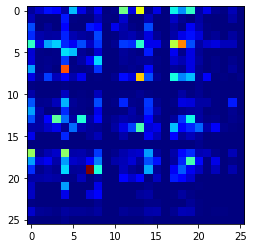

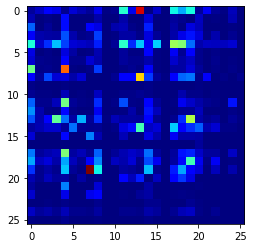

In [14]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

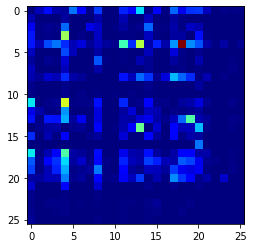

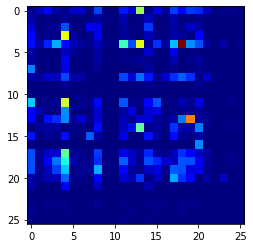

In [15]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

Let us look at the top 10 ngrams for each text. 

In [16]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [17]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('t', 'h') : 863.0
('h', 'e') : 711.0
('e', 's') : 664.0
('i', 'n') : 600.0
('a', 'n') : 549.0
('e', 'r') : 493.0
('r', 'a') : 460.0
('r', 'e') : 453.0
('a', 'l') : 420.0
('n', 'd') : 400.0

English 2:
('t', 'h') : 1479.0
('a', 'n') : 1368.0
('h', 'e') : 1190.0
('i', 'n') : 1014.0
('n', 't') : 833.0
('e', 'r') : 800.0
('e', 's') : 753.0
('r', 'e') : 751.0
('l', 'e') : 723.0
('h', 'a') : 716.0

French 1:
('e', 's') : 645.0
('l', 'e') : 394.0
('e', 'n') : 367.0
('d', 'e') : 349.0
('o', 'n') : 309.0
('n', 't') : 289.0
('r', 'e') : 289.0
('e', 'l') : 277.0
('r', 'a') : 230.0
('l', 'a') : 228.0

French 2:
('e', 's') : 1034.0
('n', 't') : 796.0
('d', 'e') : 657.0
('e', 'n') : 650.0
('l', 'e') : 625.0
('a', 'n') : 556.0
('o', 'n') : 485.0
('r', 'e') : 483.0
('e', 'l') : 439.0
('s', 'e') : 392.0


## At times, we need to reduce the number of features. We will discuss this more in the upcoming sessions, but a small example has been discussed here. Instead of using each unique token (a word) as a feature, we reduced the number of features by using 1-gram and 2-gram of characters as features.

We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics. 

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

## Features of Images. 
### Images in digital format are stored as numeric values, and hence we can use these values as features. for ex : a black and white (binary) image is stored as an array of 0  and 255 or 0 and 1.

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [18]:
from keras.datasets import mnist
 
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Extract a subset of the data for our experiment:

In [19]:
no1 = train_X[train_y==1,:,:] ## dataset corresponding to number = 1.
no0 = train_X[train_y==0,:,:] ## dataset corresponding to number = 0.

Let us visualize a few images here:

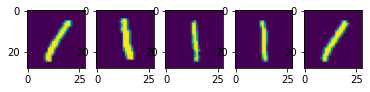

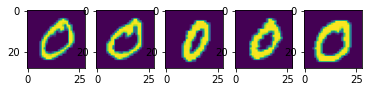

In [20]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

## We can even use value of each pixel as a feature. But let us see how to derive other features.

Now, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [21]:
## sum of pixel values.

sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

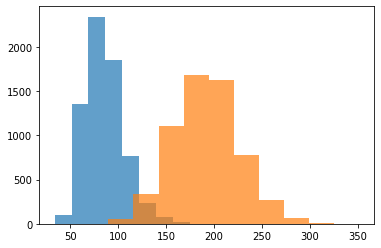

In [22]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [23]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  #print(img2)
  img2 = img2>0
  #print(img2)
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

Visualize a few:

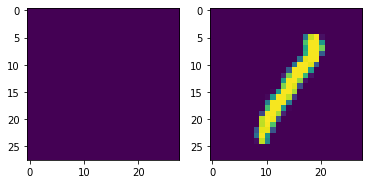

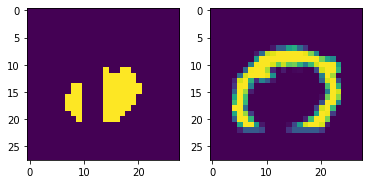

In [24]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

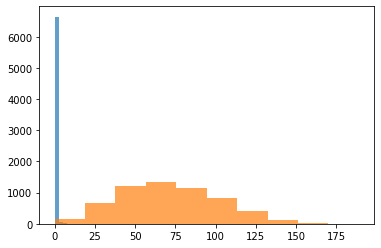

In [25]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])
  
plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero. 


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [26]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

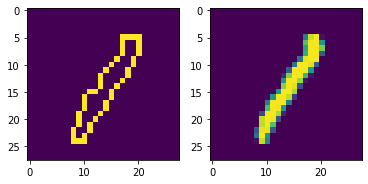

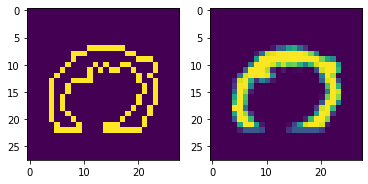

In [27]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

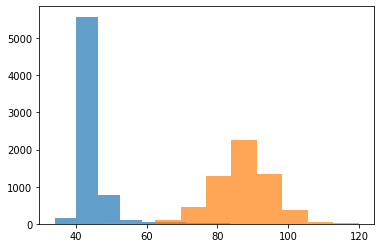

In [28]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together? 

Feel free to explore the above graph with your mouse. 


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

## Features from CSV file

In [29]:
import pandas as pd

df = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [30]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [31]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [32]:
df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})

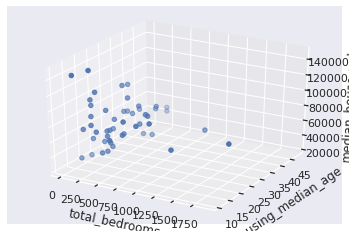

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['total_bedrooms'][:50]
y = df['housing_median_age'][:50]
z = df['median_house_value'][:50]

ax.set_xlabel("total_bedrooms")
ax.set_ylabel("housing_median_age")
ax.set_zlabel("median_house_value")

ax.scatter(x, y, z)

plt.show()

Task


In [34]:
## Task :
## Download a CSV file from the internet, upload it to your google drive.
## Read the CSV file and plot graphs using different combination of features and write your analysis
## Ex : IRIS flower datasaet
##dataset under consideration adult dataset



In [35]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:

df = pd.read_csv('/content/drive/MyDrive/adult.csv')

In [37]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [38]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [39]:
df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})

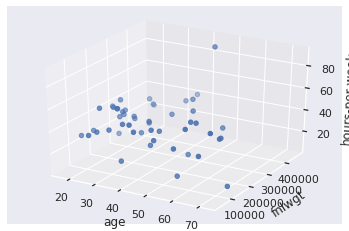

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['age'][:50]
y = df['fnlwgt'][:50]
z = df['hours-per-week'][:50]

ax.set_xlabel("age")
ax.set_ylabel("fnlwgt")
ax.set_zlabel("hours-per-week")

ax.scatter(x, y, z)

plt.show()